In [2]:
"""Creating get_sgima fucntion as a jupyter-notebook (down with sublime)"""

'Creating get_sgima fucntion as a jupyter-notebook (down with sublime)'

In [3]:
import cosmic

In [4]:
from cosmic.sample import InitialBinaryTable

In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [6]:
names_gc = ['ID_x', 'Name', 'RA', 'DEC', 'L','B','R_Sun','R_gc','X','Y', 'Z', 'key_0','[Fe/H]_x', 'wt', 'E(B-V)_x',\
 'V_HB','(m-M)V_x', 'V_t', 'M_V,t', 'U-B', 'B-V', 'V-R', 'V-I', 'spt', 'ellip', 'ID_y', 'v_r', '+/-', 'v_LSR' ,'sig_v' ,'+/-.1', 'c', 'r_c', 'r_h', 'mu_V',\
  'rho_', 'lg(tc)', 'lg(th)', 'Mcl[Msun]', 'rh[pc]', '[Fe/H]_y', 'age[Gyr]', '(m-M)V_y', 'E(B-V)_y', 'log10(rho[Msun]/pc^3)',\
 'rc', 'sigma0[km/s]', 'esigma0[km/s]', 'fb', 'efb', '[M/H]', 'Rgc[kpc]','Rsun[kpc]']

# names in OC datafile
names_oc = ['Cluster_name', 'RA', 'DEC', 'l', 'b', 'Dist Mod', 'EB-V', 'Age', 'ST' ,'Z', 'Diam', 'Fe/H', 'MRV',\
 'pm RA', 'pm Dec', 'logM[Msun]', 'rtP[pc]', 'log(t[yr])K', 'rcK[pc]', 'rtK[pc]', 'Rhm[pc]',\
  '[Fe/H]K]', 'deltaV', 'sigdV', '[FeH]', 'sigFeH', 't', 'sigt', 'logt' ,'Rgc' ,'z' ,'Diam[pc]', 'd[pc]']
path = '/Users/andrewbowen/ceb_project/data/data_files'

# Globular cluster read in
GCs = pd.read_csv(path + '/GC_data/gc_data.txt', sep = ' ', header = 0, names = names_gc)

# Open Cluster Read-in
OCs = pd.read_csv(path + '/OC_data/oc_data.txt', sep = ' ', header = 0)

In [7]:
# Globular Cluster core radius
gc_rc = GCs['r_c']

gc_distance = GCs['Rsun[kpc]']
a = math.sqrt(2) * gc_rc
print(GCs)
# Squared z velocity dispersion (from core radius) - will need cluster mass maybe 

          ID_x       Name           RA          DEC       L      B  R_Sun  \
0      NGC 104     47 Tuc  00 24 05.67  -72 04 52.6  305.89 -44.89    4.5   
1      NGC 288        NaN  00 52 45.24  -26 34 57.4  152.30 -89.38    8.9   
2      NGC 362        NaN  01 03 14.26  -70 50 55.6  301.53 -46.25    8.6   
3    Whiting 1        NaN     02 02 57    -03 15 10  161.22 -60.76   30.1   
4     NGC 1261        NaN  03 12 16.21  -55 12 58.4  270.54 -52.12   16.3   
5        Pal 1        NaN  03 33 20.04  +79 34 51.8  130.06  19.03   11.1   
6         AM 1        E 1   03 55 02.3    -49 36 55  258.34 -48.47  123.3   
7     Eridanus        NaN   04 24 44.5    -21 11 13  218.10 -41.33   90.1   
8        Pal 2        NaN  04 46 05.91  +31 22 53.4  170.53  -9.07   27.2   
9     NGC_1851        NaN  05 14 06.76  -40 02 47.6  244.51 -35.03   12.1   
10    NGC_1904       M 79  05 24 11.09  -24 31 29.0  227.23 -29.35   12.9   
11    NGC 2298        NaN  06 48 59.41  -36 00 19.1  245.63 -16.00   10.8   

In [33]:
"""Globular Cluster for loop - getting velocity dispersion for each cluster
(as given by Plummer models) -- may need to check units on formula bc values 
seem a bit off"""
gc_indices = []
n = 0
GCs['sigma_v'] = pd.Series(np.zeros(len(GCs)), index = GCs.index)
print('Globular Cluster Velocity Dispersions:')
for index, cluster in GCs.iterrows():
    rc = cluster['rh[pc]'] * (3.086 * (10**13))#core radius (parsecs)

    a = math.sqrt(2) * rc
    mass = cluster['Mcl[Msun]']
    dist = cluster['Rsun[kpc]']
    
#     Checking that there is a mass value
    if mass != -9.99:
#         Formula from Plummer model
        sigma_z = math.sqrt(((3/64)*(math.pi)*(6.6741 * (10**(-20) * (mass * 2 * (10 **30)))/rc)))
        print(sigma_z, "km/s")
#         Increment counter
        n += 1
        gc_indices.append(index)#gives indices of GCs with calculates sigma value
        GCs['sigma_v'].iloc[index]= sigma_z
        
# Percent of velocity dispersions covered
percent_rec = n/len(GCs)
print(f'The percent of globular clusters with a sigma value is: {percent_rec}')

Globular Cluster Velocity Dispersions:
12.388961978119479 km/s
11.18738699097014 km/s
6.667341665169919 km/s
11.411947738430275 km/s
7.88390798388407 km/s
3.439950065640019 km/s
5.457760773148108 km/s
16.673228110759574 km/s
4.847198106860366 km/s
3.4445416644871707 km/s
4.64021557999934 km/s
4.626147378579214 km/s
6.606004265915379 km/s
6.975154076584317 km/s
2.042281547324406 km/s
13.518913373283088 km/s
7.529252050635176 km/s
11.723723509216898 km/s
2.5114154708201952 km/s
4.540105553262397 km/s
6.0241957619003195 km/s
9.481090478634629 km/s
3.3631317425366487 km/s
9.712943179334562 km/s
7.677256312836536 km/s
5.42961174231543 km/s
9.350693552170716 km/s
10.967422248010934 km/s
5.445472393904873 km/s
3.716425213313383 km/s
3.766748896974164 km/s
9.819640698179656 km/s
4.891660314028271 km/s
9.062593741626891 km/s
7.552218198755199 km/s
6.092616492902982 km/s
3.268453705815242 km/s
6.547738384437803 km/s
16.774566236707408 km/s
12.024376178201095 km/s
7.523626870544231 km/s
6.8723719

In [34]:
gc_calcsigma = GCs['sigma_v']
print((gc_calcsigma, GCs['sigma0[km/s]']))

(0      12.388962
1       0.000000
2      11.187387
3       0.000000
4       6.667342
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9      11.411948
10      7.883908
11      3.439950
12      5.457761
13      0.000000
14      0.000000
15     16.673228
16      0.000000
17      0.000000
18      4.847198
19      0.000000
20      0.000000
21      3.444542
22      4.640216
23      0.000000
24      4.626147
25      6.606004
26      6.975154
27      2.042282
28     13.518913
29      7.529252
         ...    
127     6.000048
128     9.357500
129     0.000000
130     6.438904
131     0.000000
132     6.388262
133    13.011301
134     3.774333
135     6.177821
136     0.000000
137     7.777288
138     7.383591
139     5.765937
140     0.000000
141     0.000000
142     0.000000
143     5.106917
144     0.000000
145     0.000000
146     3.136052
147    10.212815
148     5.758525
149     3.938549
150     0.000000
151     0.000000
152     0.000000
153     6.540604
154     0.000

In [9]:
print(OCs.columns)

Index(['Unnamed: 0', 'Cluster_name', 'RA', 'DEC', 'l', 'b', 'Dist', 'Mod',
       'EB-V', 'Age', 'ST', 'Z', 'Diam', 'Fe/H', 'MRV', 'pm RA', 'pm Dec',
       'logM[Msun]', 'rtP[pc]', 'log(t[yr])K', 'rcK[pc]', 'rtK[pc]', 'Rhm[pc]',
       '[Fe/H]K]', 'deltaV', 'sigdV', '[FeH]', 'sigFeH', 't', 'sigt', 'logt',
       'Rgc', 'z', 'Diam[pc]', 'd[pc]'],
      dtype='object')


In [10]:
# Indexing through OC's for Piskunov masses, etc. - getting velocity dispersions for Piskunov clusters
n = 0
sigma_v = []#list for adding velocity dispersions as a column in dataframe
OCs['sigma_v'] = pd.Series(np.zeros(len(OCs)), index = OCs.index)
i = []
print('Open Cluster velocity dispersions:')
for index, row in OCs.iterrows():

    rhm = row['Rhm[pc]']#Piskunov half-mass radius in parsecs
    if np.isfinite(rhm):#checking for presence of half-mass data
        a = rhm/1.305
        log_mass = row['logM[Msun]']#log mass
        mass = 10 ** log_mass#converts from log-mass to normal solar unit mass
        if rhm != -9.99:
            sigma_z = math.sqrt(((3/64)*(math.pi)*(6.6741 * (10**(-20) * (mass * 2 * (10 **30)))/rc)))
#             print('Piskunov:', sigma_z)#can print dispersion and source if necessary
            if sigma_z != 0:
                OCs['sigma_v'].iloc[index]= sigma_z
                i.append(index)
                n+=1
                
                
# Setting up for Solaris and Webda diameter/radii 
# (will still use Piskunov masses b/c that's all we have rn)  
    diam = row['Diam']#Webda
    D = row['Diam[pc]']#Solaris
    
#     Using Webda Diameter('Diam')
    if np.isfinite(diam):
        rad = diam/2
        a = rad/1.305
        log_mass = row['logM[Msun]']#log mass
        mass = 10 ** log_mass#converts from log-mass to normal solar unit mass
        if mass != -9.999 and np.isfinite(mass):
            sigma_z = math.sqrt(((3/64)*(math.pi)*(6.6741 * (10**(-20) * (mass * 2 * (10 **30)))/rc)))
#             print("Webda",sigma_z)#can print dispersion and source if necessary
            if sigma_z != 0:
                OCs['sigma_v'].iloc[index]= sigma_z
                n+=1
                i.append(index)
    
#     Now using Solaris Diameter (D)
    if np.isfinite(D):        
        R = D/2#setting up radius
        a = R/1.305
        log_mass = row['logM[Msun]']#log mass
        mass = 10 ** log_mass#converts from log-mass to normal solar unit mass
        if mass != -9.999 and np.isfinite(mass):
            sigma_z = math.sqrt(((3/64)*(math.pi)*(6.6741 * (10**(-20) * (mass * 2 * (10 **30)))/rc)))
#             print("Solaris:", sigma_z)#can print dispersion and source if necessary
            if sigma_z != 0:
                OCs['sigma_v'].iloc[index]= sigma_z
                i.append(index)
                n+=1






print("Total # sigmas:", n)
print("Total # of Open Clusters:",len(OCs))
percent = n/len(OCs)
print(f'The percent of Open Clusters we could get a velocity dispersion for is: {percent}')

Open Cluster velocity dispersions:


/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Total # sigmas: 1270
Total # of Open Clusters: 1801
The percent of Open Clusters we could get a velocity dispersion for is: 0.7051637978900611


In [11]:
print('GC values:')
print(GCs.columns)
print(' ')
print('OC values:')
print(OCs.columns)

GC values:
Index(['ID_x', 'Name', 'RA', 'DEC', 'L', 'B', 'R_Sun', 'R_gc', 'X', 'Y', 'Z',
       'key_0', '[Fe/H]_x', 'wt', 'E(B-V)_x', 'V_HB', '(m-M)V_x', 'V_t',
       'M_V,t', 'U-B', 'B-V', 'V-R', 'V-I', 'spt', 'ellip', 'ID_y', 'v_r',
       '+/-', 'v_LSR', 'sig_v', '+/-.1', 'c', 'r_c', 'r_h', 'mu_V', 'rho_',
       'lg(tc)', 'lg(th)', 'Mcl[Msun]', 'rh[pc]', '[Fe/H]_y', 'age[Gyr]',
       '(m-M)V_y', 'E(B-V)_y', 'log10(rho[Msun]/pc^3)', 'rc', 'sigma0[km/s]',
       'esigma0[km/s]', 'fb', 'efb', '[M/H]', 'Rgc[kpc]', 'Rsun[kpc]'],
      dtype='object')
 
OC values:
Index(['Unnamed: 0', 'Cluster_name', 'RA', 'DEC', 'l', 'b', 'Dist', 'Mod',
       'EB-V', 'Age', 'ST', 'Z', 'Diam', 'Fe/H', 'MRV', 'pm RA', 'pm Dec',
       'logM[Msun]', 'rtP[pc]', 'log(t[yr])K', 'rcK[pc]', 'rtK[pc]', 'Rhm[pc]',
       '[Fe/H]K]', 'deltaV', 'sigdV', '[FeH]', 'sigFeH', 't', 'sigt', 'logt',
       'Rgc', 'z', 'Diam[pc]', 'd[pc]', 'sigma_v'],
      dtype='object')


In [12]:
"""Want plots of cluster mass, radius, age, Fe/H, and distance 
        for both Open and Globular Clusters"""

# Globular cluster values - all GCs
gc_mass = GCs['Mcl[Msun]']#cluster mass in solar units: M_sun = 2*10^30 kg
gc_dist = GCs['Rsun[kpc]']#distance to cluster in kiloparsecs
# gc_dist = gc_dist * 1000#converitng to parsecs from kpc
gc_met = GCs['[Fe/H]_x']#metallicity
gc_rad = GCs['rh[pc]']#core radius in arcmin
gc_age = GCs['age[Gyr]']#age

# Open CLuster values - all OCS
oc_age = OCs['Age']#WEBDA age
oc_diam_w = OCs['Diam']#WEBDA diam
oc_rad = oc_diam_w / 2
oc_met = OCs['Fe/H']#WEBDA Met
oc_dist = OCs['Dist']#WEBDA Dist
oc_rhm = OCs['Rhm[pc]']
oc_diam_s = OCs['Diam[pc]']#Solaris diameter
oc_rad_s = oc_diam_s /2#solaris radius
oc_mass = OCs['logM[Msun]']#mass for open clusters (given by Solaris)


In [13]:
# Getting values for selected velo dispersion ones
sGCs = GCs.iloc[gc_indices]#'sigma' GCs - ones where we were able to get a velocity dispersion
sOCs = OCs.iloc[i]#'sigma' OCs - ones where we were able to get a velocity dispersion


In [14]:
# Globular cluster values - all GCs
sgc_mass = sGCs['Mcl[Msun]']#cluster mass in solar units: M_sun = 2*10^30 kg
sgc_dist = sGCs['Rsun[kpc]']#distance to cluster in kiloparsecs
# sgc_dist = sgc_dist * 1000#converitng to parsecs from kpc
sgc_met = sGCs['[Fe/H]_x']#metallicity
sgc_rad = sGCs['rh[pc]']#core radius in arcmin
sgc_age = sGCs['age[Gyr]']#age

# Open Cluster values - all OCS
soc_age = sOCs['Age']#WEBDA age
soc_diam_w = sOCs['Diam']#WEBDA diam
soc_rad = soc_diam_w / 2
soc_met = sOCs['Fe/H']#WEBDA Met
soc_dist = sOCs['Dist']#WEBDA Dist
soc_rhm = sOCs['Rhm[pc]']
soc_diam_s = sOCs['Diam[pc]']#Solaris diameter
soc_rad_s = soc_diam_s /2#solaris radius
soc_mass = sOCs['logM[Msun]']#mass for open clusters (given by Solaris)

In [15]:
gc_mass = gc_mass.loc[np.where(gc_mass.values != -9.99)]
print(len(gc_mass)/len(GCs))
print(len(GCs))

0.5859872611464968
157


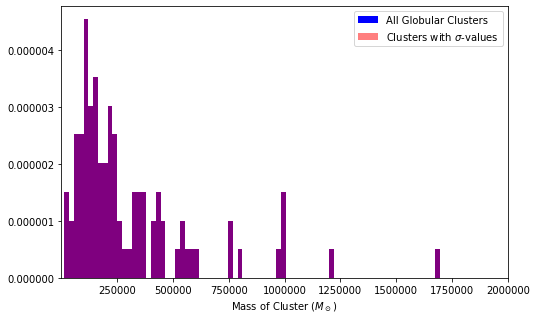

In [16]:
# Mass Histograms
f,ax = plt.subplots(figsize = (8,5))

# Globular Clusters 
ax.hist(gc_mass, bins = 100, density = True, color = 'b', label = 'All Globular Clusters')#all gc masses
ax.hist(sgc_mass, bins = 100, density = True, color = 'r',label = 'Clusters with $\sigma$-values', alpha = 0.5)
ax.set_xlabel('Mass of Cluster ($M_\odot$)')
ax.set_xlim(100,2000000)
ax.legend()



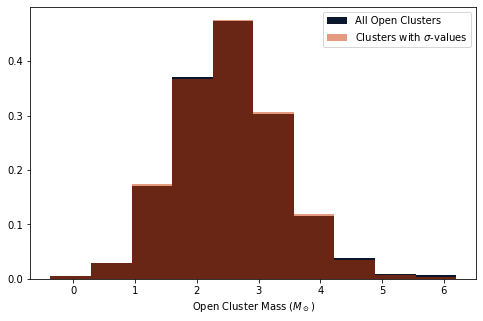

In [17]:
# Open Cluster Mass histogram
f, ax = plt.subplots(figsize = (8,5))
# print(len(soc_mass),len(oc_mass))

ax.hist(oc_mass.loc[np.isfinite(oc_mass)], density = True, \
        color = '#0A162B', label = 'All Open Clusters')#all open clusters
ax.hist(soc_mass, density = True, color = '#CA3700', label = 'Clusters with $\sigma$-values', alpha = 0.5)
ax.set_xlabel('Open Cluster Mass ($M_\odot$)')
ax.legend()

In [18]:
print(len(sgc_rad), len(gc_rad.loc[np.where(gc_rad != -9.99)]))

92 152


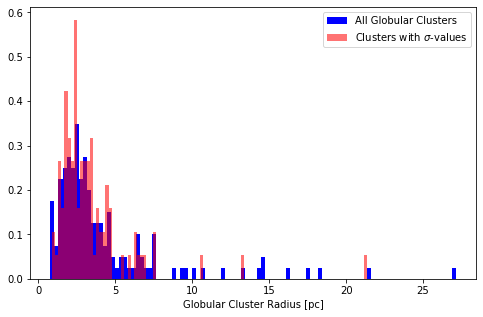

In [19]:
# Radius Histograms

# Globular Clusters
f, ax = plt.subplots(figsize = (8,5))

ax.hist(gc_rad.loc[np.where(gc_rad != -9.99)], bins = 100, density = True, color = 'b', label = 'All Globular Clusters')#all globulars
ax.hist(sgc_rad,bins = 100, density = True, color = 'r',label = 'Clusters with $\sigma$-values', alpha = 0.55)
ax.set_xlabel('Globular Cluster Radius [pc]')
# ax.set_xlim(0,30)

ax.legend()

In [20]:
print(len(soc_rad), len(oc_rad.loc[np.isfinite(oc_rad)]))

1270 1747


/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


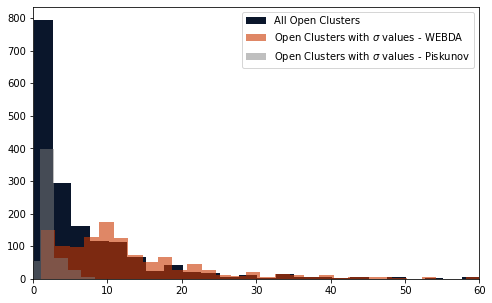

In [21]:
# Open Cluster radius plots
soc_rhm_nandrop = soc_rhm.loc[np.isfinite(soc_rhm)]
f, ax = plt.subplots(figsize = (8,5))

ax.hist(oc_rad.loc[np.isfinite(oc_rad)], bins = 100, density = False, color = '#0A162B', \
        label = 'All Open Clusters')#Radius Histogram for all open clusters
ax.hist(soc_rad.loc[np.isfinite(soc_rad)], bins = 100, density = False, color = '#CA3700', \
        label = 'Open Clusters with $\sigma$ values - WEBDA', alpha = 0.6)
ax.hist(soc_rhm_nandrop.loc[np.where(soc_rhm != -9.999)] , bins = 10, density = False, color = 'gray', \
        label = 'Open Clusters with $\sigma$ values - Piskunov', alpha = 0.5)
ax.set_xlim(0,60)
# ax.set_ylim(0,1)
ax.legend()

# Check units on these

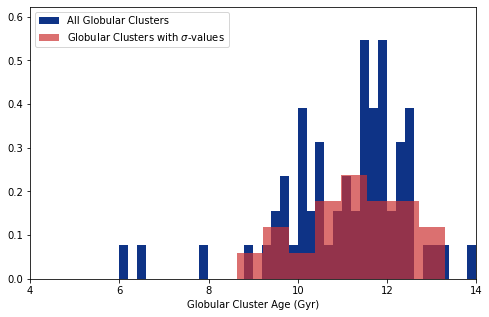

In [22]:
# Globular Cluster Age plot
sgc_age = sgc_age.loc[np.isfinite(sgc_age)]#getting rid of nan values
f,ax = plt.subplots(figsize = (8,5))

ax.hist(gc_age.loc[np.where(gc_age != -9.99)], bins = 40, density = True, color = '#0E3386', label = 'All Globular Clusters')
ax.hist(sgc_age.loc[np.where(sgc_age != -9.990)], bins = 40, density = True, color = '#CC3433',\
        label = 'Globular Clusters with $\sigma$-values', alpha = 0.7)
ax.set_xlabel('Globular Cluster Age (Gyr)')
ax.set_xlim(4,14)

ax.legend()

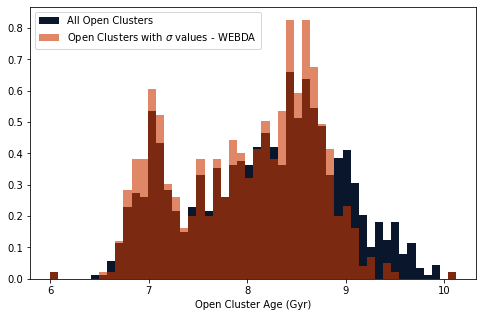

In [23]:
# Open Cluster Age Plot
# Dropping NaN values from both series
oc_age = oc_age.loc[np.isfinite(oc_age)]
soc_age = soc_age.loc[np.isfinite(soc_age)]

f,ax = plt.subplots(figsize = (8,5))

ax.hist(oc_age, bins = 50, density = True, color = '#0A162B', \
        label = 'All Open Clusters')
ax.hist(soc_age, bins = 50, density = True, color = '#CA3700', \
        label = 'Open Clusters with $\sigma$ values - WEBDA', alpha = 0.6)
ax.set_xlabel('Open Cluster Age (Gyr)')
ax.legend()

Text(0.5, 0, 'Globular Cluster Distance [kpc]')

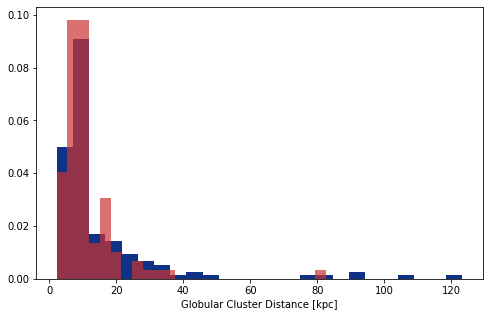

In [24]:
# Globular Cluster Distance Histogram

f, ax = plt.subplots(figsize=(8,5))

ax.hist(gc_dist, bins = 25, density = True, color = '#0E3386', label = 'All Globular Clusters')
ax.hist(sgc_dist, bins = 25, density = True, color = '#CC3433',\
        label = 'Globular Clusters with $\sigma$-values', alpha = 0.7)
ax.set_xlabel('Globular Cluster Distance [kpc]')

In [25]:
# WEBDA Distances
oc_dist = oc_dist / 1000
soc_dist = soc_dist / 1000

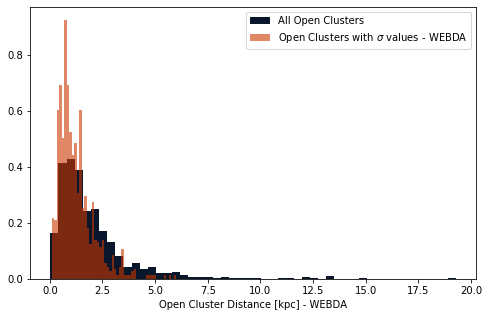

In [26]:
# Open Cluster Distance Histogram
f,ax = plt.subplots(figsize = (8,5))

ax.hist(oc_dist, bins = 50, density = True, color = '#0A162B', \
        label = 'All Open Clusters')

ax.hist(soc_dist, bins = 50, density = True, color = '#CA3700', \
        label = 'Open Clusters with $\sigma$ values - WEBDA', alpha = 0.6)

ax.set_xlabel('Open Cluster Distance [kpc] - WEBDA')
ax.legend()

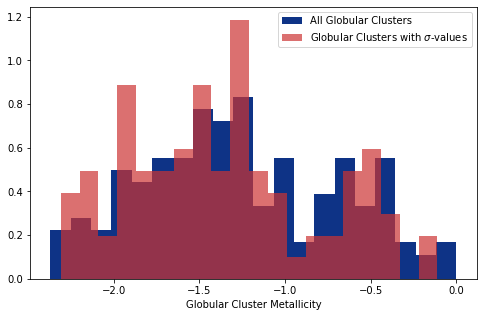

In [27]:
# Globular Cluster Metallicity Histogram
f,ax = plt.subplots(figsize = (8,5))

ax.hist(gc_met,  bins = 20, density = True, color = '#0E3386', label = 'All Globular Clusters')
ax.hist(sgc_met, bins = 20, density = True, color = '#CC3433',\
        label = 'Globular Clusters with $\sigma$-values', alpha = 0.7)
ax.set_xlabel('Globular Cluster Metallicity')
ax.legend()

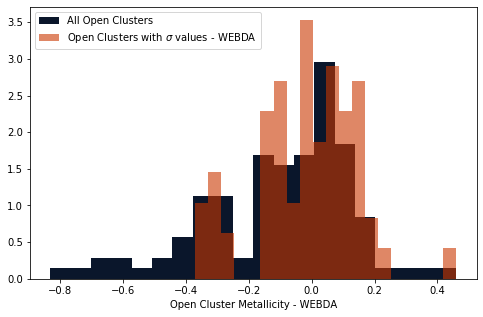

In [28]:
# Open Cluster Metallicity Histogram
oc_metal = oc_met.loc[np.isfinite(oc_met)]#getting rid of thos nasty NaN Values
soc_metal = soc_met.loc[np.isfinite(soc_met)]
f,ax = plt.subplots(figsize = (8,5))
ax.hist(oc_metal, bins = 20, density = True, color = '#0A162B', \
        label = 'All Open Clusters')
ax.hist(soc_metal, bins = 20, density = True, color = '#CA3700', \
        label = 'Open Clusters with $\sigma$ values - WEBDA', alpha = 0.6)
ax.set_xlabel('Open Cluster Metallicity - WEBDA')        
ax.legend()


In [80]:
# print(GCs['sigma_v'])
print(len(GCs['sig_v'].loc[np.isfinite(GCs['sig_v'])]))
# f,ax = plt.subplots(figsize = (8,5))

62


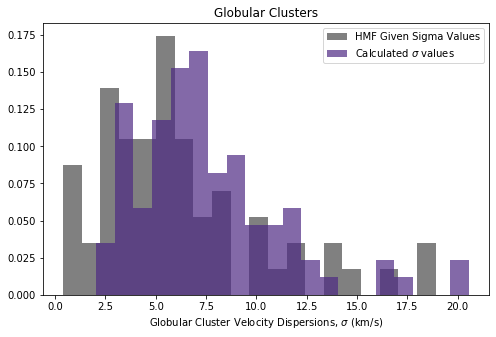

In [73]:
# Globular Clusters Velocity Dispersion Histograms
calcsigma = gc_calcsigma.loc[np.where(gc_calcsigma != 0)]#dropping bad values

f,ax = plt.subplots(figsize = (8,5))

# Calculated sigmas first
ax.hist(hmf_sigma, bins = 20,density = True, color = 'gray', label = 'HMF Given Sigma Values')
ax.hist(calcsigma, bins = 20,density = True,\
        color = '#4E2A84', label = 'Calculated $\sigma$ values', alpha = 0.7)
ax.set_xlabel('Globular Cluster Velocity Dispersions, $\sigma$ (km/s)')
ax.set_title('Globular Clusters')
ax.legend()
f.savefig('/Users/andrewbowen/ceb_project/cosmic_pop/plots_cosmic/GC-sigma-hist.pdf')
# There are more calculated values of sigma than good values given by the HMF table

In [74]:
oc_sigma = OCs['sigma_v']
OC_sigma = oc_sigma.loc[np.where(oc_sigma != 0)]


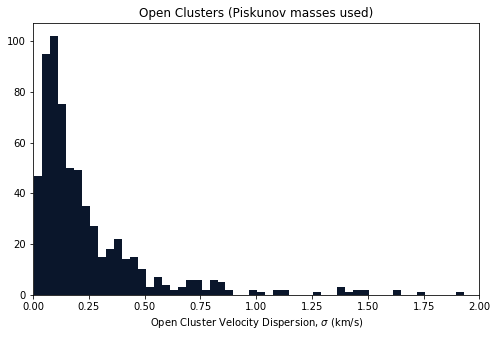

In [149]:
# Open Cluster Sigma Histogram

f,ax = plt.subplots(figsize = (8,5))

ax.hist(OC_sigma, bins = 300, color = '#0A162B')
ax.set_xlim(0,2)
ax.set_xlabel('Open Cluster Velocity Dispersion, $\sigma$ (km/s)')
ax.set_title('Open Clusters (Piskunov masses used)')
f.savefig('/Users/andrewbowen/ceb_project/cosmic_pop/plots_cosmic/OC-sigma-hist.pdf')

In [143]:
# Saving these columns to their own data file, can read in/add to data fram ine another script if needed
GCs['sigma_v'].to_csv('/Users/andrewbowen/ceb_project/cosmic_pop/gc-sigma.txt')
OCs['sigma_v'].to_csv('/Users/andrewbowen/ceb_project/cosmic_pop/oc-sigma.txt')

/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/Users/andrewbowen/anaconda3/envs/cosmic/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
hmfSig = GCs['sig_v'].loc[np.where(GCs['sigma_v'] != 0)]#Harris sigmas where we have calculates sigmas

hmfSig = hmfSig.loc[np.isfinite(hmfSig)]

# print(calcsigma.loc[np.where(hmfSig != 0)].values/hmfSig.values)

# print('Given Sigmas:', GCs['sig_v'])
# print('Calculated Sigmas:', GCs['sigma_v'])

n = 0
ratios = []
for index, row in GCs.iterrows():#checking for calculated values against hmf values
    if np.isfinite(row['sig_v']) and row['sigma_v'] != 0:
        sigma_c = row['sigma_v']#calculated sigma
        sigma_h = row['sig_v']#Harris sigma
        sig_rat = sigma_c/sigma_h
        n += 1
        ratios.append(sig_rat)
print(len(ratios))

51


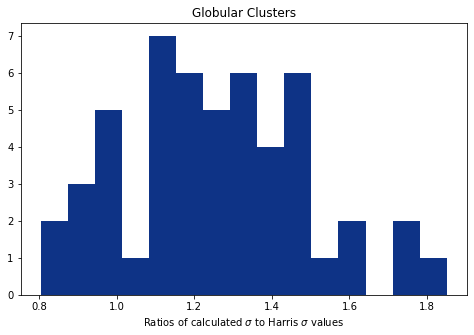

In [119]:
# Histogram of velocity dispersion ratios
f,ax = plt.subplots(figsize = (8,5))
ax.hist(ratios, bins = 15, color = '#0E3386')
ax.set_xlabel('Ratios of calculated $\sigma$ to Harris $\sigma$ values')
ax.set_title('Globular Clusters')
f.savefig('/Users/andrewbowen/ceb_project/cosmic_pop/plots_cosmic/gc-ratio-sigma-hist.pdf')
#62 GCs in total have harris and calculated sigma values